# Urban Sound Classification - Önişleme

Bu projede “UrbanSounds8K” veri setini kullanarak şehirlerde duyulan seslerin
sınıflandırılmasıyla ilgili bir proje yapacağız. Bu projede hedefimiz, derin öğrenme algoritmalarını kullanarak yapay zeka modeli hazırlamaktır. Veri setini indirecek, ses dosyalarından spectrogram oluşturacak ve bunları ait oldukları kategorilere göre bilgisayara kaydedeceğiz. Daha sonra bu görüntülere önişleme yaparak CNN modeli hazırlayacak ve bu modeli eğiteceğiz.

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keyword "import".

In [2]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import OpenCV
import cv2

# Import Pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from numpy import save
from PIL import Image 

import os
#import glob

# 0. Veri Setinin İncelenmesi
Bu veri seti, kentsel seslerin 8732 etiketli ses alıntısını (<=4s) 10 sınıfta içerir: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. 

## 2. Önişleme

a. Görüntüleri (spectrogramları) sırasıyla okuyarak, grayscale dönüşümü, resizing
ve normalizasyon yapın

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#/content/drive/MyDrive/spectrograms/0 ... /content/drive/MyDrive/spectrograms/9
i = 0
specs = []
class_specs = []

while i < 10:
      path = '/content/drive/MyDrive/spectrograms/' + str(i)
      print(path)
      #spect = pd.read(path)
      for filename in os.listdir(path):
        image = Image.open(os.path.join(path,filename)).convert('L')
        resized = image.resize((100, 100))
        img_norm = np.asarray(resized)/255    

        if i == 0:
          label = 'air conditioner'
        if i == 1:
          label = 'car horn'
        if i == 2:
          label = 'children playing'
        if i == 3:
          label = 'dog bark'
        if i == 4:
          label = 'drilling'
        if i == 5:
          label = 'engine idling'
        if i == 6:
          label = 'gun shot'
        if i == 7:
          label = 'jackhammer'
        if i == 8:
          label = 'siren'
        if i == 9:
          label = 'street music'

        if image is not None:
          specs.append(img_norm)
          #specs[value].append(label)
          class_specs.append(label)
      i += 1


/content/drive/MyDrive/spectrograms/0
/content/drive/MyDrive/spectrograms/1
/content/drive/MyDrive/spectrograms/2
/content/drive/MyDrive/spectrograms/3
/content/drive/MyDrive/spectrograms/4
/content/drive/MyDrive/spectrograms/5
/content/drive/MyDrive/spectrograms/6
/content/drive/MyDrive/spectrograms/7
/content/drive/MyDrive/spectrograms/8
/content/drive/MyDrive/spectrograms/9


b. Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir
listeye ekleyin. 

In [21]:
dataset = []
specs_num = list(range(1,8732))
for num in specs_num:
  dataset.append([specs[num], class_specs[num]])

c. Bu listeyi kullanarak, X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini
oluşturun.


In [22]:
train = [i[0] for i in dataset]
test = [i[1] for i in dataset]

In [23]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2




📌 Use f-strings for this.

In [24]:
# Print the number of samples 
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 5238
X_test: 1747


Before we move on with the preprocessing of the data, we can print a random sample to see what the data looks like.

In [25]:
# Print a sample from X_test dataset
print(X_test[789])

[[0.90588235 0.08627451 0.         ... 0.         0.         0.        ]
 [0.90588235 0.08627451 0.         ... 0.         0.         0.        ]
 [0.90588235 0.08627451 0.         ... 0.         0.         0.        ]
 ...
 [0.90196078 0.11764706 0.03529412 ... 0.05882353 0.11372549 0.07843137]
 [0.91372549 0.22352941 0.1254902  ... 0.16470588 0.14509804 0.12941176]
 [0.99215686 0.94901961 0.94509804 ... 0.94509804 0.94509804 0.94509804]]


The numbers we see here are pixel values. This is how computers see images. But like this, it doesn’t mean much to us. Let’s visualize this sample.

📌 Convert the pixel values into an image by using the *imshow()* function of the Matplotlib library. 

📌 Print the shape of the image using *shape*.

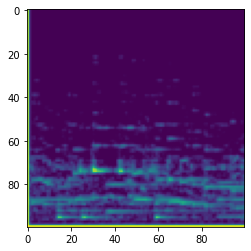

(100, 100)


In [26]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[789])
plt.show()
# Print the shape of the sample image
print(X_test[789].shape)

d. Bu veri setlerini bilgisayarınıza kaydedin.

In [27]:
np.save('/content/drive/MyDrive/data/X_train.npy', X_train) # save the file as "outfile_name.npy" 
np.save('/content/drive/MyDrive/data/X_test.npy', X_test) 
np.save('/content/drive/MyDrive/data/X_val.npy', X_val)
np.save('/content/drive/MyDrive/data/y_train.npy', y_train) # save the file as "outfile_name.npy" 
np.save('/content/drive/MyDrive/data/y_test.npy', y_test) 
np.save('/content/drive/MyDrive/data/y_val.npy', y_val)